# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [0]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

#### Step 1: Load and Process the Data

In [63]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


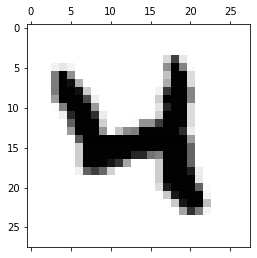

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [64]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#### Step 2: Define the Neural Net and its Architecture



In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 3: Choose the Optimizer and the Cost Function

Ho scelto di confrontare 3 optimizer: SGD, RMSprop, Adam.

In [66]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

def compile_model2():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer = RMSprop() , metrics=['accuracy'])
    return model

def compile_model3():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer = Adam(epsilon = 1) , metrics=['accuracy'])
    return model

print('Models compiled successfully and ready to be trained.')

Models compiled successfully and ready to be trained.


#### Step 4: Train the model


In [67]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()
model_DNN2 = compile_model2()
model_DNN3 = compile_model3()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

history2 = model_DNN2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

history3 = model_DNN3.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.7571 - accuracy: 0.7773 - val_loss: 0.3108 - val_accuracy: 0.9181
Epoch 2/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.3838 - accuracy: 0.8913 - val_loss: 0.2374 - val_accuracy: 0.9325
Epoch 3/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.3093 - accuracy: 0.9127 - val_loss: 0.2015 - val_accuracy: 0.9412
Epoch 4/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.2651 - accuracy: 0.9252 - val_loss: 0.1724 - val_accuracy: 0.9491
Epoch 5/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.2332 - accuracy: 0.9354 - val_loss: 0.1537 - val_accuracy: 0.9552
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.2846 - accuracy: 0.9184 - val_loss: 0.1247 - val_accuracy: 0.9655
Epoch 2/5
60000/6

#### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

10000/10000 [==============================] - 0s 44us/step

Test loss with SGD: 0.15372152312770485
Test accuracy with SGD: 0.9552000164985657

Test loss with RMSprop: 0.18439791012520879
Test accuracy with RMSprop: 0.9728000164031982

Test loss with ADAM: 0.4398562265872955
Test accuracy with ADAM: 0.8919000029563904


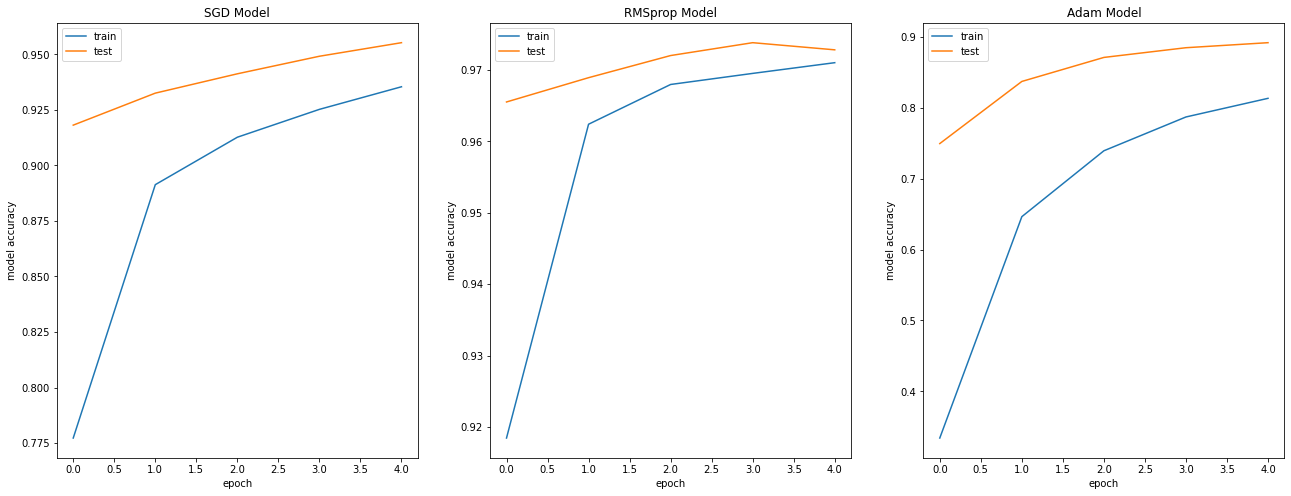

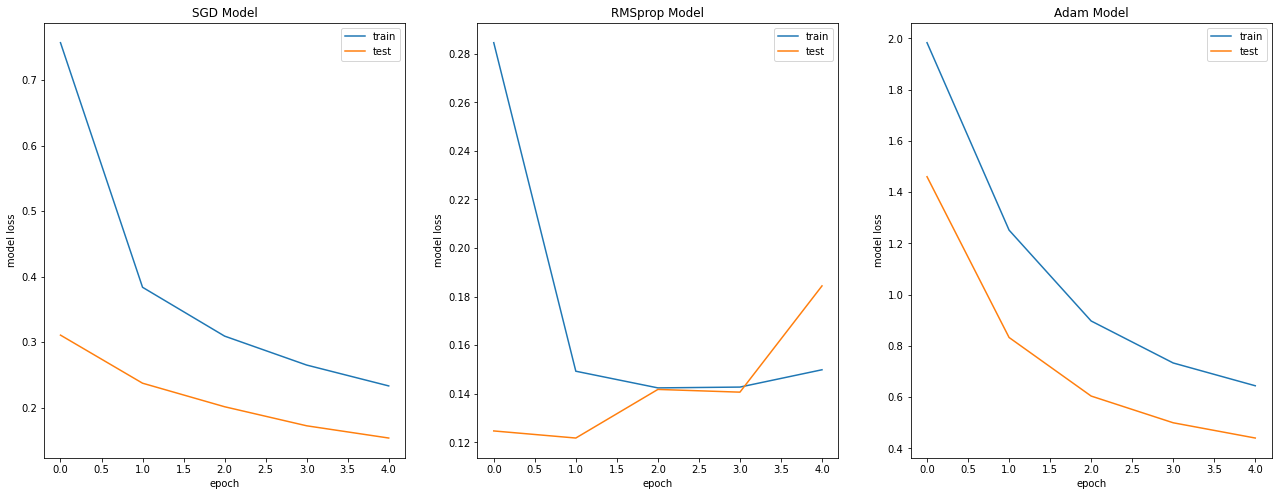

In [68]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)
score2 = model_DNN2.evaluate(X_test, Y_test, verbose=1)
score3 = model_DNN3.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss with SGD:', score[0])
print('Test accuracy with SGD:', score[1])
print()
print('Test loss with RMSprop:', score2[0])
print('Test accuracy with RMSprop:', score2[1])
print()
print('Test loss with ADAM:', score3[0])
print('Test accuracy with ADAM:', score3[1])

# look into training history

# summarize history for accuracy
plt.figure(figsize=[22,8])
plt.subplot(1,3,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('SGD Model')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.subplot(1,3,2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('RMSprop Model')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.subplot(1,3,3)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Adam Model')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.figure(figsize=[22,8])
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('SGD Model')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.subplot(1,3,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('RMSprop Model')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.subplot(1,3,3)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Adam Model')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

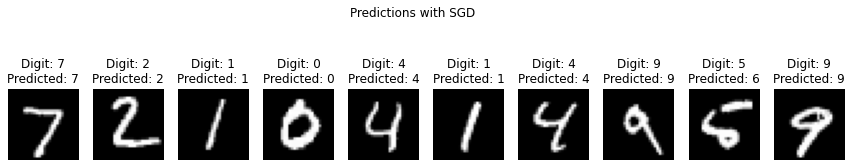

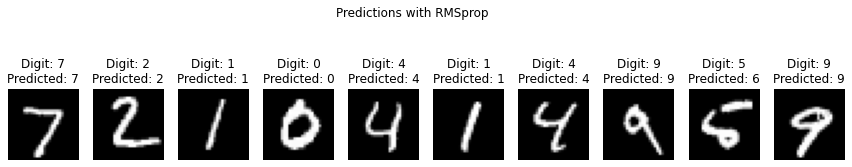

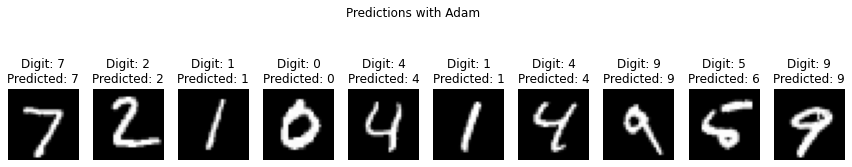

In [47]:
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 6))
plt.suptitle('Predictions with SGD')
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions2 = model_DNN2.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 6))
plt.suptitle('Predictions with RMSprop')
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions2[i])))    
    plt.axis('off')
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions3 = model_DNN3.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 6))
plt.suptitle('Predictions with Adam')
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions3[i])))    
    plt.axis('off')
plt.show()

### COMMENTI

Gli optimizer che ho testato sono RMSprop e Adam, ed i risultati sono confrontati con quelli ottenuti con SGD:

- L'uso dell'optimizer RMSprop migliora l'accuratezza del modello, tuttavia la funzione loss rimane decrescente sui dati di training per sole due epoche (il modello è overfittato);

- L'uso dell'optimizer Adam peggiora l'accuratezza, ma l'andamento della funzione loss suggerisce che il numero di epoche utilizzato per il training è basso; dopo sole 5 epoche la loss con l'optimizer Adam è maggiore dela loss con l'optimizer SGD, ma sta decrescendo più velocemente.

- Non ci sono differenze tra i tre optimizer sui tentativi di predizione sul set di test; indipendentemente dall'optimizer utilizzato la DNN predice correttamente 9 numeri su 10, probabilmente perchè il 5 (che viene predetto come 6) è disegnato male.